In [2]:
# pip install plotly_express 

In [3]:
import pandas as pd

titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls'
titanic = pd.read_excel(titanic_url)

In [4]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# EDA

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#### f, ax 사용하기

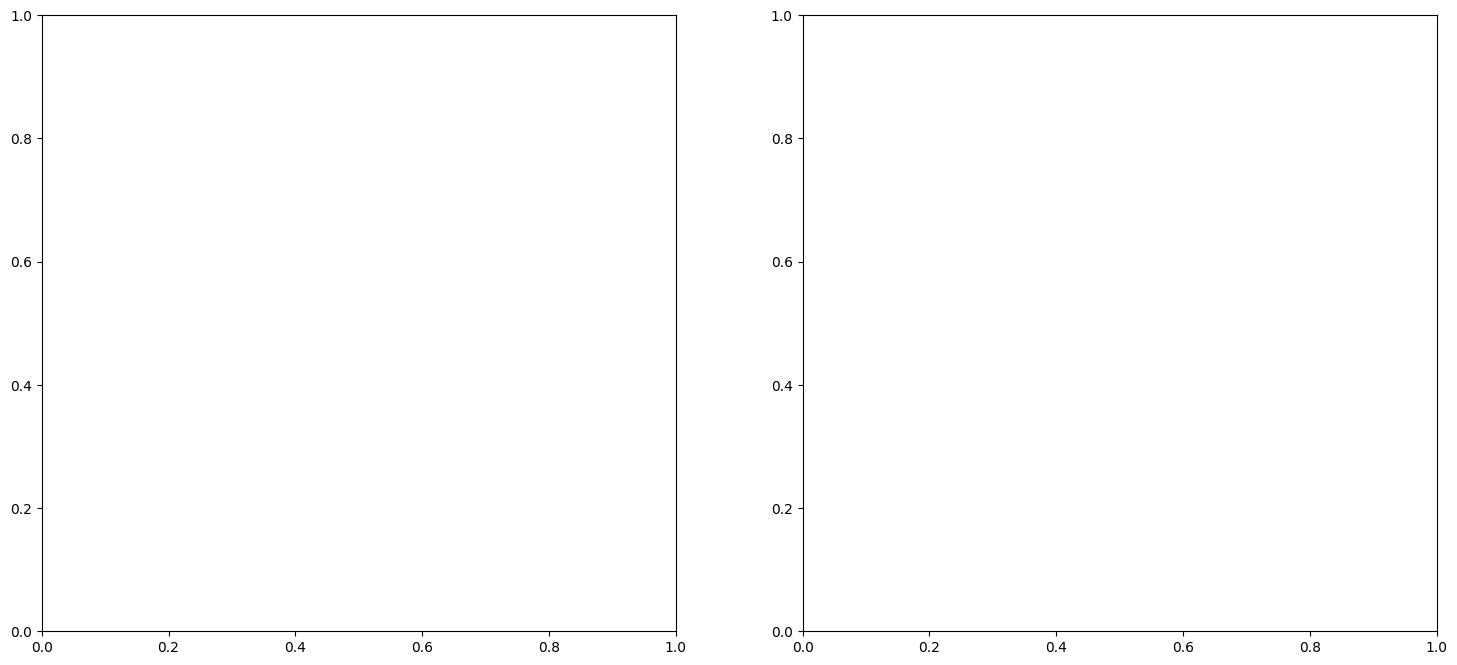

In [6]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) 

In [7]:
len(ax)

2

#### 생존상황 전체

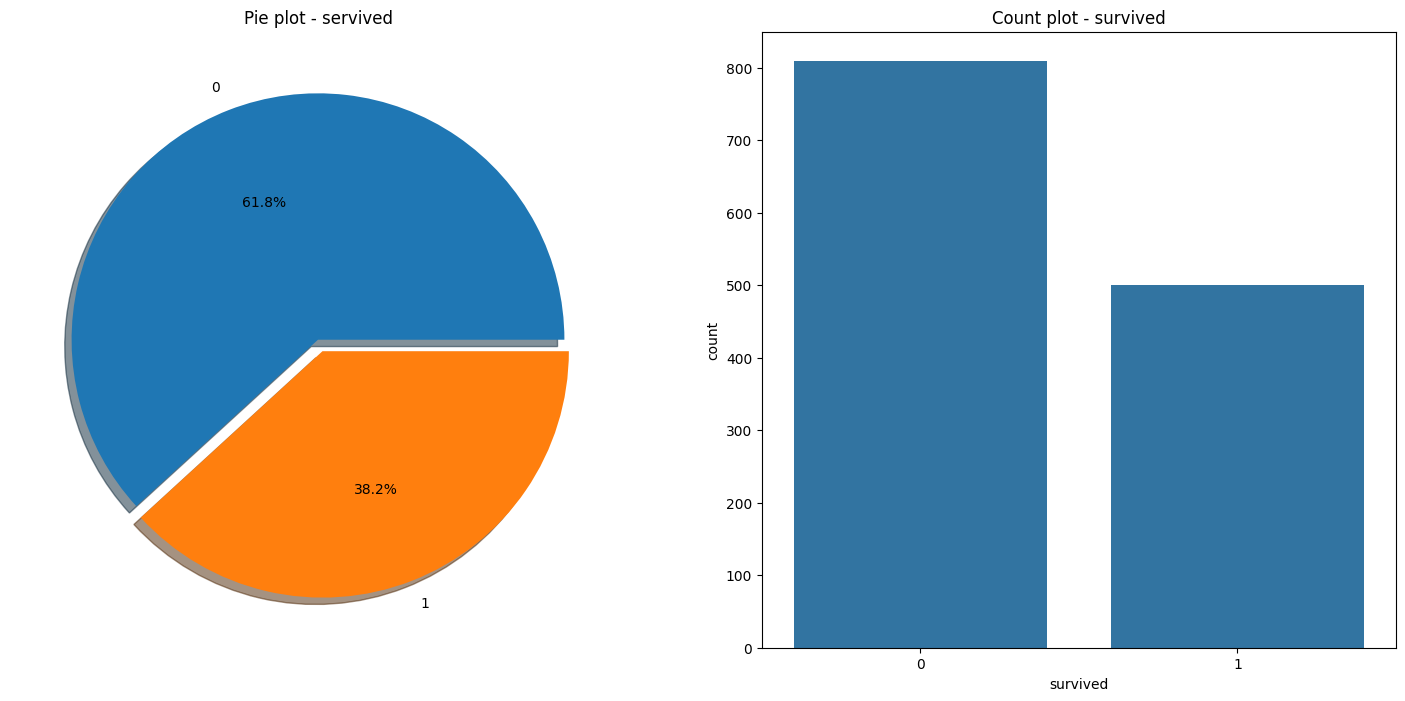

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

titanic['survived'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', shadow=True, explode=[0, 0.05])
ax[0].set_title('Pie plot - servived')
ax[0].set_ylabel('')

sns.countplot(x='survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - survived')

plt.show()

#### 성별에 따른 생존 현황

Text(0.5, 1.0, 'Sex : survived ')

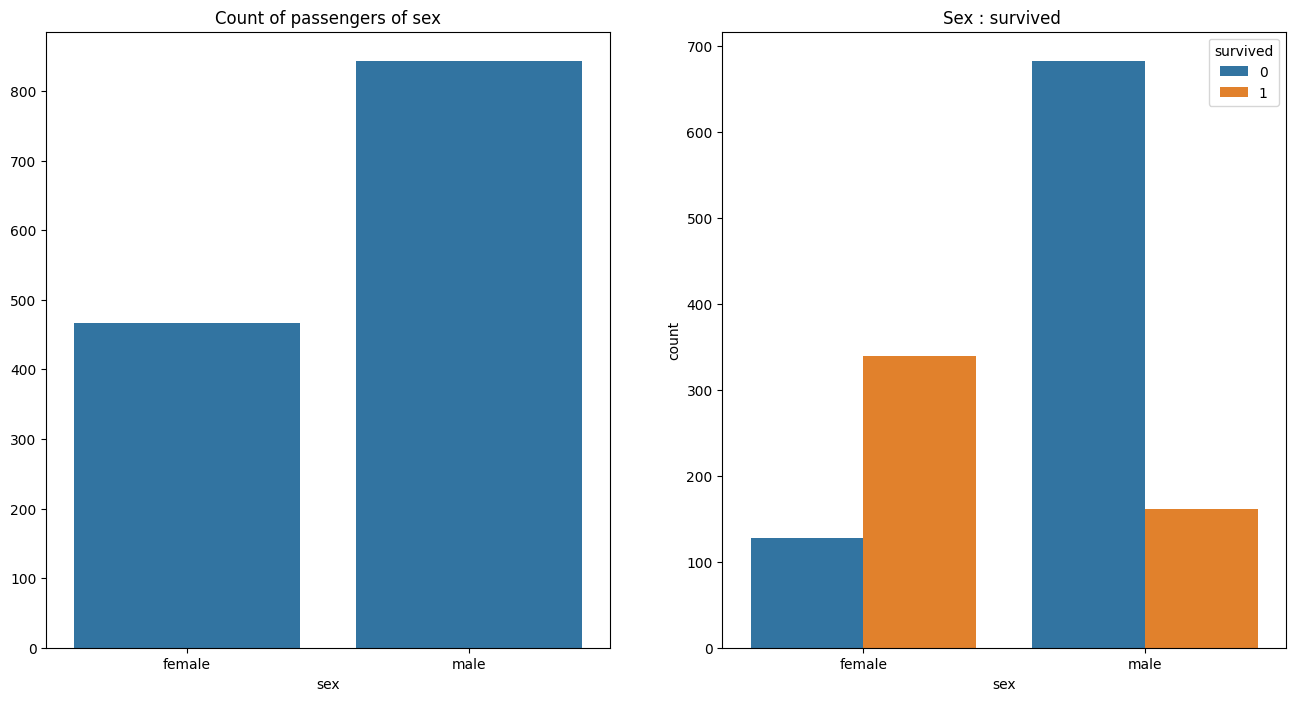

In [9]:
f, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.countplot(x='sex', data=titanic, ax=ax[0])
ax[0].set_title('Count of passengers of sex')
ax[0].set_ylabel('')

sns.countplot(x='sex', data=titanic, hue='survived',ax=ax[1])
ax[1].set_title('Sex : survived ')

```
탑승객 중 남성 비율이 대략 2배이나 여성의 생존 인원 보다 더 낮음
-> 남성의 생존 가능성이 더 낮다. 
```

#### 경제력 대비 생존률

In [10]:
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


```
1등실의 생존 가능성이 아주 높다.
+ 여성의 생존률도 높다.
=> 1등실에 여성이 많이 타고 있었을까 ?
```

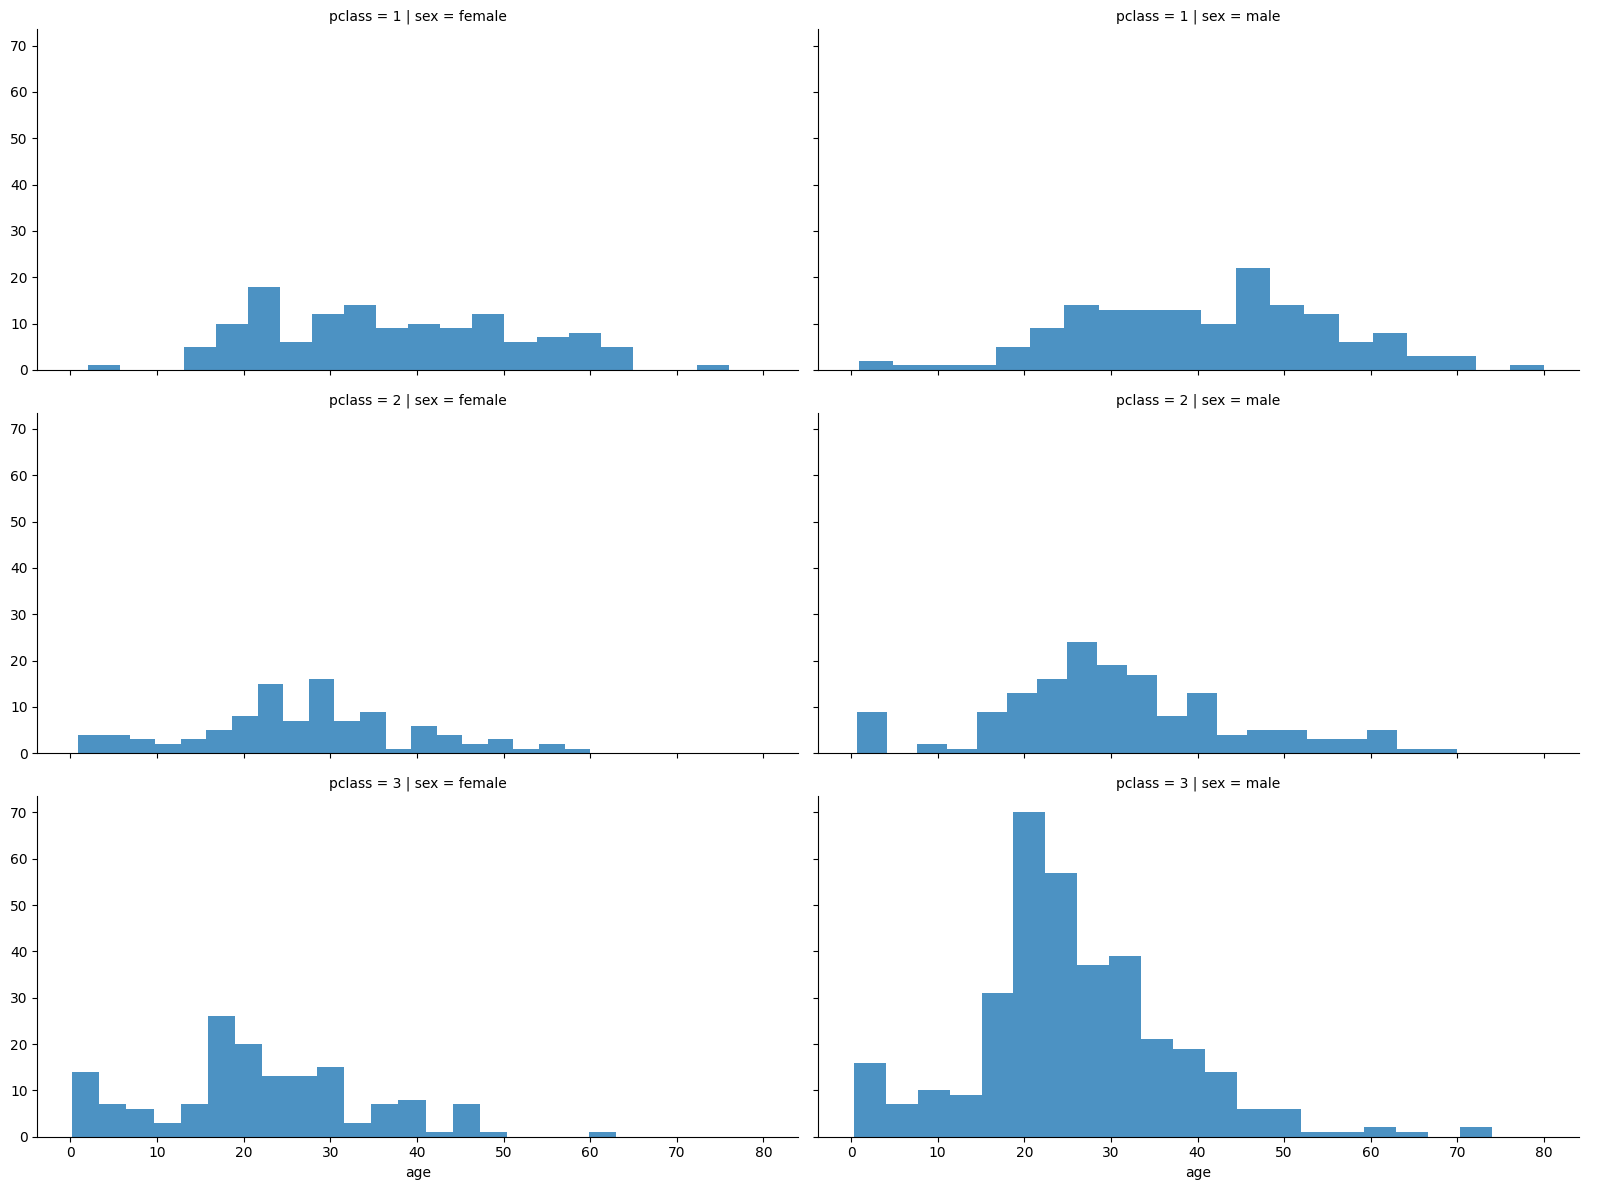

In [11]:
grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=0.8, bins=20)
grid.add_legend();

```
-> 3등실에는 남성이 많았다. (특히 20대 남성)
```

#### 나이별 승객 현황

In [12]:
import plotly.express as px

In [13]:
fig = px.histogram(titanic, x='age')
fig.show()

```
-> 아이들 + 2~30대가 많았다.
```

### 등실별 생존률을 연령대 별로 보기

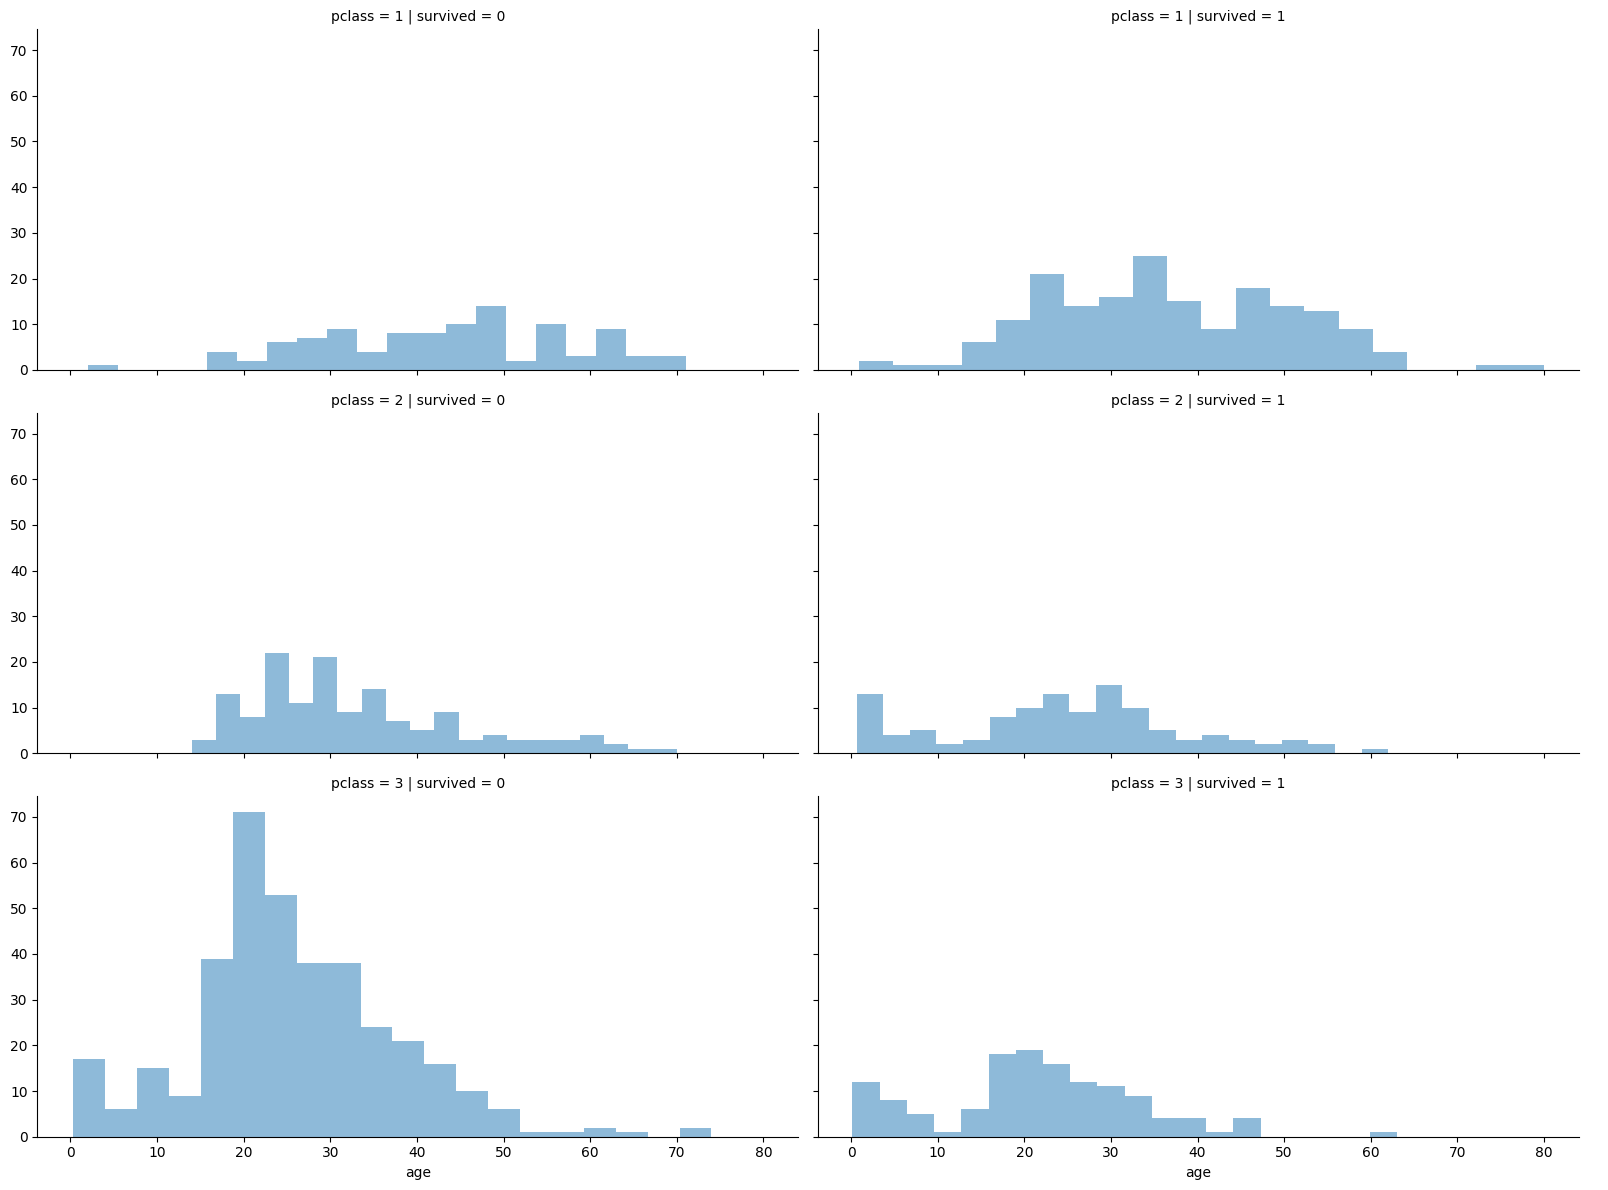

In [14]:
grid = sns.FacetGrid(titanic, row='pclass', col='survived', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=0.5, bins=20)
grid.add_legend();

```
-> 선실 등급이 높으면 생존률이 높다.
```

### 나이를 5단계로 정리하기

In [15]:
titanic['age_cat'] = pd.cut(titanic['age'], bins=[0, 7, 15, 30, 60, 100],
                            include_lowest=True,
                            labels= ['baby', 'teen', 'young', 'adult', 'old'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


### 나이, 성별, 등급별 생존자 수를 시각화 

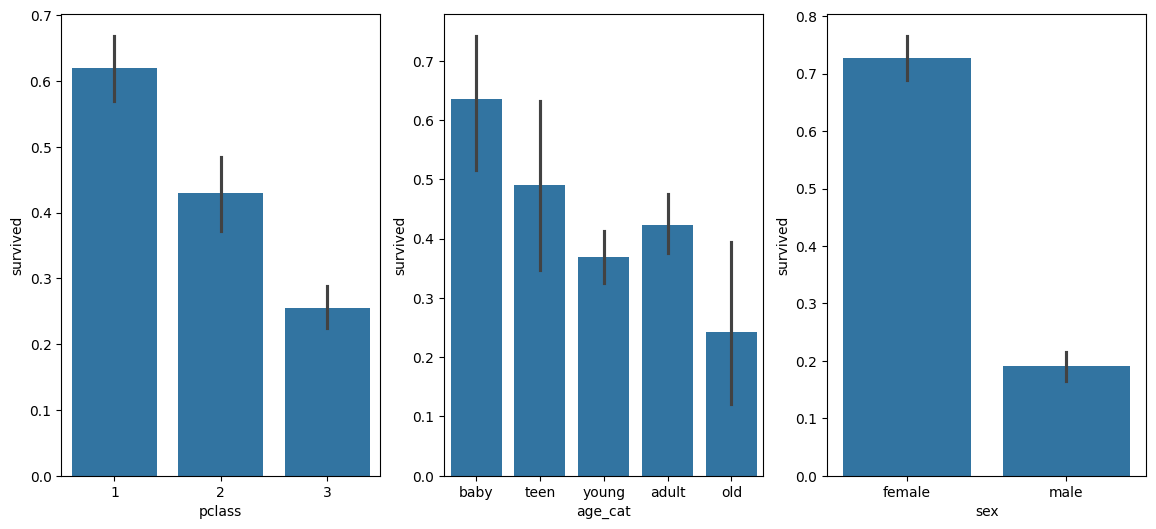

In [16]:
plt.figure(figsize=(14, 6))

plt.subplot(131)
sns.barplot(x='pclass', y='survived', data=titanic)

plt.subplot(132)
sns.barplot(x='age_cat', y='survived', data=titanic)

plt.subplot(133)
sns.barplot(x='sex', y='survived', data=titanic)

plt.show()

```
-> 어리고 + 여성 + 1등실 일 수록 생존에 유리
```

### 남/여 나이별 생존 현황을 더 자세히 보기

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

women = titanic[titanic['sex']=='female']
men = titanic[titanic['sex']=='male']

ax = sns.displot(women[women['survived']==1]['age'], bins=20, label='survived', ax=axes[0], ked=False)
ax = sns.displot(women[women['survived']==0]['age'], bins=40, label='not survived', ax=axes[0])
ax.legend(); ax.set_title('Female')

ax = sns.displot(women[men['survived']==1]['age'], bins=18, label='survived', ax=axes[1], ked=False)
ax = sns.displot(women[men['survived']==0]['age'], bins=40, label='not survived', ax=axes[1])
ax.legend(); ax.set_title('Male')

### 탑승객의 이름에서 신분 알아보기

In [18]:
import re

title = []
for idx, dataset in titanic.iterrows():
    tmp = dataset['name']
    title.append(re.search('\,\s\w+(\s\w+)?\.', tmp).group()[2:-1])
    
titanic['title'] = title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


### 사회적 신분으로 귀족 정리하기

In [19]:
pd.crosstab(titanic['title'], titanic['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [20]:
titanic['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [21]:
titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Miss')

Rare_f = ['Dona', 'Lady', 'the Countess']
Rare_m = ['Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Dr', 'Master', 'Jonkheer']

In [22]:
for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each, 'Rare_f')
    
for each in Rare_m:
    titanic['title'] = titanic['title'].replace(each, 'Rare_m')    

In [23]:
titanic['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

### 결과 해석

In [24]:
titanic[['title', 'survived']].groupby(['title'], as_index=False).mean()

,title,survived
0,Miss,0.679245
1,Mr,0.162483
2,Mrs,0.786802
3,Rare_f,1.000000
4,Rare_m,0.448276


```
-> 생존률: 귀족 여성 > 평민 여성 > 귀족 남성 > 평민 남성 
```

# Machine Learning

### 간단히 구조 확인

In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
dtypes: category(1), float64(3), int64(4), object(8)
memory usage: 155.0+ KB


### ml을 위해 해당 컬럼을 숫자로 변경

#### Label 인코더

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])

LabelEncoder()

In [27]:
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare_m,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs,0


### 결측치는 무시

In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
 16  gender     1309 non-null   int64   
dtypes: category(1), float64(3), int64(5), object(8)
memory usage: 165.2+ KB


In [29]:
titanic = titanic[titanic['age'].notnull()]
titanic =  titanic[titanic['fare'].notnull()]

In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   object  
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
 16  gender     1045 non-null   int64   
dtypes: category(1), float64(3), int64(5), object(8)
memory usage: 140.0+ KB


### 특성이해 -> 데이터 나누기

In [31]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'age_cat',
       'title', 'gender'],
      dtype='object')

In [32]:
from sklearn.model_selection import train_test_split

X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]
y = titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=2, random_state=13)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.7559808612440191


### 디카프리오 생존률은 ?

In [41]:
import numpy as np

# ['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']
decaprio = np.array([[3, 18, 0, 0, 5, 1]])
print('Decaprio: ', dt.predict_proba(decaprio)[0,1])

Decaprio:  0.1507537688442211


/Users/soy/miniconda3/envs/ds_study/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



### 윈슬릿의 생존률은 ? 

In [42]:
winslet = np.array([[1, 16, 1, 1, 100, 0]])
print('Winslet: ', dt.predict_proba(winslet)[0,1])

Winslet:  0.9326424870466321


/Users/soy/miniconda3/envs/ds_study/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

